# IMPORTING LIBRARIES

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

# IMPORTING DATASET

In [2]:
df = pd.read_csv("heart.csv")


# FEATURE ENGINEERING

In [3]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## FEATURE SELECTION 

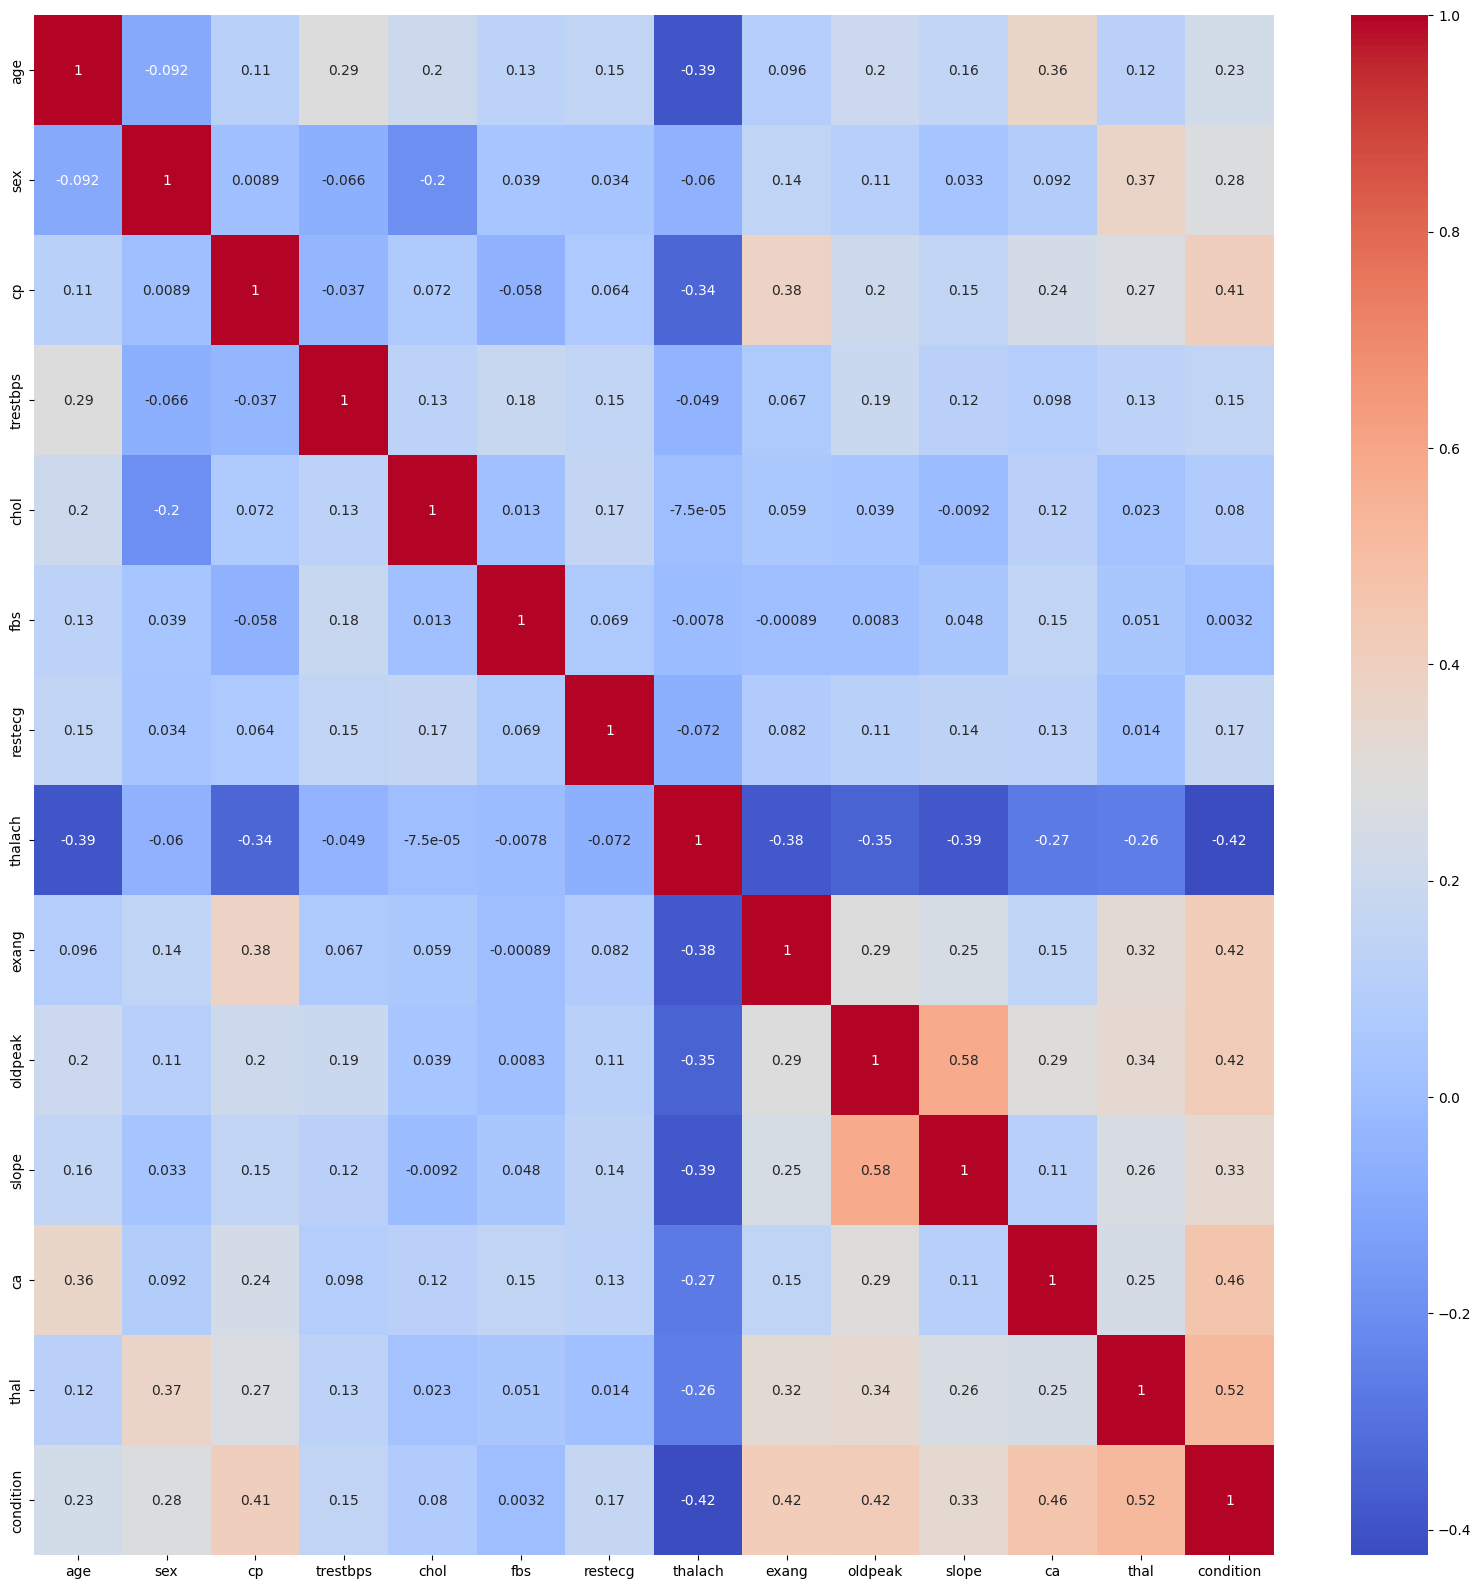

In [4]:
plt.figure(figsize=(20,20))
d = sns.heatmap(df.corr(), cmap="coolwarm", annot= True)

# FEATURE SCALING

In [5]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset [columns_to_scale] = standardScaler.fit_transform(dataset [columns_to_scale])

In [6]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,1.600302,1.596266,-0.257179,-0.812095,-0.820813,0,False,True,True,False,...,False,True,False,False,True,False,False,True,False,False
1,1.600302,0.468418,-0.160859,0.061157,0.639470,0,True,False,True,False,...,True,False,False,False,False,True,False,True,False,False
2,1.268242,1.032342,-0.411292,-1.554358,1.326662,0,True,False,True,False,...,False,False,True,True,False,False,False,True,False,False
3,1.157555,0.355633,0.667499,1.065396,0.295874,1,False,True,True,False,...,False,True,False,False,True,False,False,True,False,False
4,1.046868,-1.223355,-0.700254,-0.244481,0.639470,0,False,True,True,False,...,False,True,False,True,False,False,False,True,False,False


# MODEL SELECTION

In [7]:
from sklearn.model_selection import cross_val_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [8]:
x = df.drop('condition', axis=1)

In [9]:
y = df['condition']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
y_test

167    1
211    1
63     0
154    0
5      0
77     0
183    1
158    1
9      0
139    0
285    0
78     0
92     0
101    0
42     0
222    1
283    1
33     1
263    1
148    0
245    1
45     1
60     0
46     0
278    0
237    1
175    1
234    1
17     0
279    1
111    0
219    1
24     0
82     0
7      1
75     1
108    0
84     0
90     0
73     0
116    0
126    1
233    0
59     0
195    1
208    1
97     0
185    1
176    0
124    0
93     1
294    1
182    1
275    0
192    1
292    1
25     0
224    1
6      0
181    1
Name: condition, dtype: int64

## SUPPORT VECTOR MACHINE 

In [13]:
from sklearn import svm

In [14]:
svm = svm.SVC()

In [15]:
svm.fit(x_train,y_train)

SVC()

In [16]:
y_pred2 = svm.predict(x_test)

In [17]:
accuracy_score (y_test,y_pred2)

0.5666666666666667

# LOGISTIC REGRESSION

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log = LogisticRegression() 
log.fit(x_train,y_train)

C:\Users\Kethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred1 = log.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score (y_test,y_pred1)

0.7333333333333333

In [23]:
clf = LogisticRegression(max_iter=1000)  # You can increase the value if needed
clf.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

# GRADIENT BOOSTING CLASSIFIER

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
gbc = GradientBoostingClassifier()

In [26]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [27]:
y_pred6 = gbc.predict(x_test)

In [28]:
accuracy_score(y_test,y_pred6)

0.7333333333333333

# RANDOM FOREST CLASSIFIER

In [29]:
from sklearn. ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pred5= rf.predict(x_test)

In [33]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# KNN

In [34]:
knn_classifier = KNeighborsClassifier (n_neighbors = 5)

In [35]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
score=cross_val_score (knn_classifier, x_train,y_train, cv=10)

In [37]:
y_pred_knn = knn_classifier.predict(x_test)

In [38]:
accuracy_score (y_test, y_pred_knn)

0.5666666666666667

# SAVE MODEL USING JOBLIB

In [39]:
import joblib

In [40]:
joblib.dump (rf, 'model_joblib_heart')

['model_joblib_heart']

In [41]:
model = joblib.load('model_joblib_heart')

# GUI

In [42]:
import tkinter as tk
from tkinter import ttk

In [43]:
# Create a function to predict heart disease
def predict_heart_disease():
    # Extract values from the input fields
    age = float(age_entry.get())
    sex = float(sex_entry.get())
    cp = float(cp_entry.get())
    trestbps = float(trestbps_entry.get())
    chol = float(chol_entry.get())
    fbs = float(fbs_entry.get())
    restecg = float(restecg_entry.get())
    thalach = float(thalach_entry.get())
    exang = float(exang_entry.get())
    oldpeak = float(oldpeak_entry.get())
    slope = float(slope_entry.get())
    ca = float(ca_entry.get())
    thal = float(thal_entry.get())
    
    # Make a prediction using the trained classifier
    input_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]
    prediction = clf.predict(input_data)
    
    # Display the prediction result
    if prediction[0] == 0:
        result_label.config(text="No Heart Disease")
    elif prediction[0] == 1:
        result_label.config(text="Heart Disease")

# Create the tkinter GUI
root = tk.Tk()
root.title("Heart Disease Prediction")

mainframe = ttk.Frame(root, padding="10")
mainframe.grid(column=0, row=0, sticky=(tk.N, tk.W, tk.E, tk.S))
mainframe.columnconfigure(0, weight=1)
mainframe.rowconfigure(0, weight=1)

# Create input fields for various features
ttk.Label(mainframe, text="Age").grid(column=1, row=1)
ttk.Label(mainframe, text="Sex").grid(column=1, row=2)
ttk.Label(mainframe, text="Chest Pain Type (CP)").grid(column=1, row=3)
ttk.Label(mainframe, text="Resting Blood Pressure (trestbps)").grid(column=1, row=4)
ttk.Label(mainframe, text="Cholesterol (chol)").grid(column=1, row=5)
ttk.Label(mainframe, text="Fasting Blood Sugar (fbs)").grid(column=1, row=6)
ttk.Label(mainframe, text="Resting Electrocardiographic Results (restecg)").grid(column=1, row=7)
ttk.Label(mainframe, text="Maximum Heart Rate Achieved (thalach)").grid(column=1, row=8)
ttk.Label(mainframe, text="Exercise-Induced Angina (exang)").grid(column=1, row=9)
ttk.Label(mainframe, text="Oldpeak").grid(column=1, row=10)
ttk.Label(mainframe, text="Slope of the Peak Exercise ST Segment (slope)").grid(column=1, row=11)
ttk.Label(mainframe, text="Number of Major Vessels (ca)").grid(column=1, row=12)
ttk.Label(mainframe, text="Thalassemia (thal)").grid(column=1, row=13)

age_entry = ttk.Entry(mainframe)
age_entry.grid(column=2, row=1)
sex_entry = ttk.Entry(mainframe)
sex_entry.grid(column=2, row=2)
cp_entry = ttk.Entry(mainframe)
cp_entry.grid(column=2, row=3)
trestbps_entry = ttk.Entry(mainframe)
trestbps_entry.grid(column=2, row=4)
chol_entry = ttk.Entry(mainframe)
chol_entry.grid(column=2, row=5)
fbs_entry = ttk.Entry(mainframe)
fbs_entry.grid(column=2, row=6)
restecg_entry = ttk.Entry(mainframe)
restecg_entry.grid(column=2, row=7)
thalach_entry = ttk.Entry(mainframe)
thalach_entry.grid(column=2, row=8)
exang_entry = ttk.Entry(mainframe)
exang_entry.grid(column=2, row=9)
oldpeak_entry = ttk.Entry(mainframe)
oldpeak_entry.grid(column=2, row=10)
slope_entry = ttk.Entry(mainframe)
slope_entry.grid(column=2, row=11)
ca_entry = ttk.Entry(mainframe)
ca_entry.grid(column=2, row=12)
thal_entry = ttk.Entry(mainframe)
thal_entry.grid(column=2, row=13)

# Add a button to make predictions
predict_button = ttk.Button(mainframe, text="Predict", command=predict_heart_disease)
predict_button.grid(column=2, row=14)

# Add a label to display the result
result_label = ttk.Label(mainframe, text="")
result_label.grid(column=2, row=15)

root.mainloop()